# 3D Cell-cell Communication

This part shows how to perform Cell-cell Communication on 3D data (several samples).

## MSData Construction

Drosophila data is used here for demo, download the [example data](http://116.6.21.110:8090/share/dd965cba-7c1f-40b2-a275-0150890e005f) first.

In [ ]:
import os
from natsort import natsorted
import stereo as st
from stereo.core.ms_data import MSData
from stereo.core.ms_pipeline import slice_generator

import warnings
warnings.filterwarnings('ignore')

# prepara for input directory
data_dir = './Demo_3D/3D_AnnData_0.8.0/'
files = []
for i in os.listdir(data_dir):
    files.append(os.path.join(data_dir, i))

# ensure data order by naming them regularly
files = natsorted(files)

# construct MSData object 
ms_data = MSData(_relationship='continuous', _var_type='intersect')

# add all samples into MSData
for sample in files:
    ms_data += st.io.read_h5ad(sample, bin_type='bins', bin_size=1)

## Spatial Alignment

In the analysis related to 3D data, we will recontruct 3D mesh in visualizing stage. It means that three-dimensional coordinates are needed, and we have to run `spatial_alignment` for better visualization. This function recalculates x-coordinate and y-coordinate, acoording to expression matrix, for that matter you could decide where to perform it, before filtering and normalization or after them.

In [3]:
ms_data.tl.spatial_alignment()

[2023-07-10 22:54:01][Stereo][8464][MainThread][4848][methods][80][INFO]: Using selected backend cpu. If you want to use gpu, set use_gpu = True.
[2023-07-10 22:54:01][Stereo][8464][MainThread][4848][st_pipeline][37][INFO]: start to run filter_genes...
[2023-07-10 22:54:01][Stereo][8464][MainThread][4848][st_pipeline][40][INFO]: filter_genes end, consume time 0.0650s.
[2023-07-10 22:54:01][Stereo][8464][MainThread][4848][st_pipeline][37][INFO]: start to run filter_genes...
[2023-07-10 22:54:01][Stereo][8464][MainThread][4848][st_pipeline][40][INFO]: filter_genes end, consume time 0.0590s.
[2023-07-10 22:54:05][Stereo][8464][MainThread][4848][methods][80][INFO]: Using selected backend cpu. If you want to use gpu, set use_gpu = True.
[2023-07-10 22:54:05][Stereo][8464][MainThread][4848][st_pipeline][37][INFO]: start to run filter_genes...
[2023-07-10 22:54:05][Stereo][8464][MainThread][4848][st_pipeline][40][INFO]: filter_genes end, consume time 0.0600s.
[2023-07-10 22:54:05][Stereo][846

[2023-07-10 22:56:05][Stereo][8464][MainThread][4848][st_pipeline][40][INFO]: filter_genes end, consume time 0.1320s.
[2023-07-10 22:56:17][Stereo][8464][MainThread][4848][methods][80][INFO]: Using selected backend cpu. If you want to use gpu, set use_gpu = True.
[2023-07-10 22:56:17][Stereo][8464][MainThread][4848][st_pipeline][37][INFO]: start to run filter_genes...
[2023-07-10 22:56:17][Stereo][8464][MainThread][4848][st_pipeline][40][INFO]: filter_genes end, consume time 0.1040s.
[2023-07-10 22:56:17][Stereo][8464][MainThread][4848][st_pipeline][37][INFO]: start to run filter_genes...
[2023-07-10 22:56:17][Stereo][8464][MainThread][4848][st_pipeline][40][INFO]: filter_genes end, consume time 0.1110s.


ms_data: {'0': (482, 13668), '1': (549, 13668), '2': (598, 13668), '3': (713, 13668), '4': (744, 13668), '5': (815, 13668), '6': (925, 13668), '7': (1272, 13668), '8': (1263, 13668), '9': (1248, 13668), '10': (1039, 13668), '11': (1260, 13668), '12': (959, 13668), '13': (1078, 13668), '14': (1240, 13668), '15': (1110, 13668)}
num_slice: 16
names: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
obs: ['batch']
var: []
relationship: continuous
var_type: intersect to 13668
mss: []

After loading files into MSData, you need to perform integration. The parameter `space_between` represents the distance between each adjacent pair, which will be used for z-coordinate of each sample. If data already has z-coordinate information, it will be used firstly, or you have to set `space_between` acoording to biochemical experiment records.

<div class="alert alert-info">

**Note**

`ms_data.integrate()` is necessarily to be performed after data loading. Default method is `intersect`, which means to take the intersection of genes (var) for subsequent multi-sample analysis. After integration, `_var_type` shows the intersect gene number from 0 to 13668. Otherwise here also provide `union` method.

</div>

In [2]:
# ms_data.integrate(space_between='10um')
ms_data.integrate()
ms_data

ms_data: {'0': (482, 13668), '1': (549, 13668), '2': (598, 13668), '3': (713, 13668), '4': (744, 13668), '5': (815, 13668), '6': (925, 13668), '7': (1272, 13668), '8': (1263, 13668), '9': (1248, 13668), '10': (1039, 13668), '11': (1260, 13668), '12': (959, 13668), '13': (1078, 13668), '14': (1240, 13668), '15': (1110, 13668)}
num_slice: 16
names: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
obs: ['batch']
var: []
relationship: continuous
var_type: intersect to 13668
mss: []

## Preprocessing

`scope` and `mode` are crucial parameters in basic multi-sample analysis and correlated funcitons.

 - `scope` , similar to list, means which samples used for analysis.
 - `mode`, like a switch, shows that analysis is performed on single sample or multi samples, `integrate` and `isolated`. It is easy to distinguish processing modes.

In [4]:
ms_data.tl.cal_qc(scope=slice_generator[:],mode='integrate')
ms_data.tl.raw_checkpoint()
ms_data

[2023-07-10 22:57:08][Stereo][8464][MainThread][4848][ms_pipeline][106][INFO]: data_obj(idx=0) in ms_data start to run cal_qc
[2023-07-10 22:57:08][Stereo][8464][MainThread][4848][st_pipeline][37][INFO]: start to run cal_qc...
[2023-07-10 22:57:09][Stereo][8464][MainThread][4848][st_pipeline][40][INFO]: cal_qc end, consume time 0.1220s.
[2023-07-10 22:57:09][Stereo][8464][MainThread][4848][ms_pipeline][106][INFO]: data_obj(idx=0) in ms_data start to run raw_checkpoint


ms_data: {'0': (482, 13668), '1': (549, 13668), '2': (598, 13668), '3': (713, 13668), '4': (744, 13668), '5': (815, 13668), '6': (925, 13668), '7': (1272, 13668), '8': (1263, 13668), '9': (1248, 13668), '10': (1039, 13668), '11': (1260, 13668), '12': (959, 13668), '13': (1078, 13668), '14': (1240, 13668), '15': (1110, 13668)}
num_slice: 16
names: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
obs: ['batch', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt']
var: ['n_cells', 'n_counts', 'mean_umi']
relationship: continuous
var_type: intersect to 13668
mss: []

If necessary, you can run `ms_data.tl.filter_cells()` to filter cells based on some indicators calculated based on QC metrics.
`ms_data.plt.genes_count` is a good option to observe gene distribution before filtration.

Show the spatial scatter figure of QC distribution. In Multi-sample analysis, serveral parameters are added here for better visual presentation.

[2023-07-10 22:57:14][Stereo][8464][MainThread][4848][ms_pipeline][106][INFO]: data_obj(idx=0) in ms_data start to run spatial_scatter


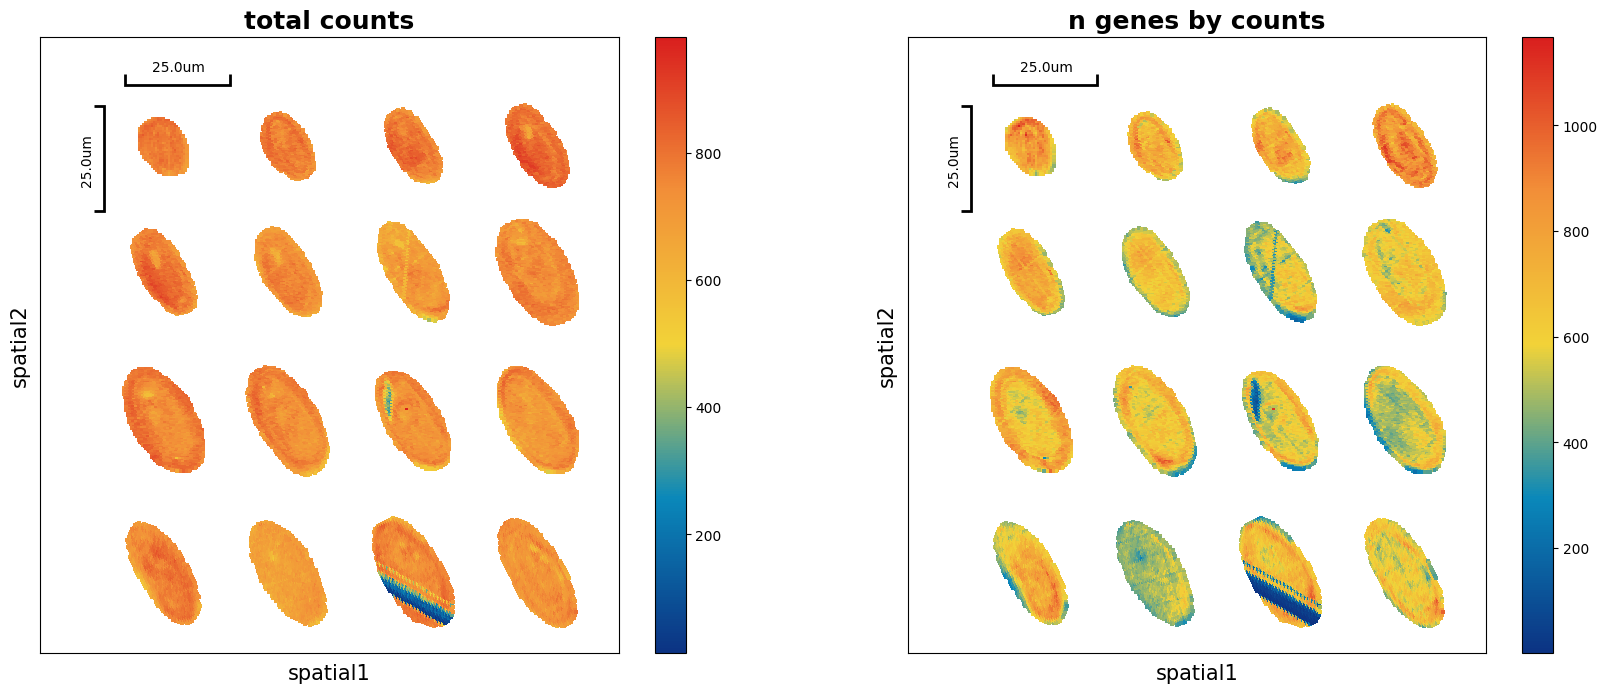

In [5]:
ms_data.plt.spatial_scatter(
            scope=slice_generator[:],
            mode='integrate',
            plotting_scale_width=50,          # the width of scale
            reorganize_coordinate=4,          # the number of plots in each row
            horizontal_offset_additional=20,  # adjustment for horizontal distance
            vertical_offset_additional=20     # adjustment for vertical distance
            )
# because of the coordinates of cells (bins) are modified in merged_data.plt.spatial_scatter,
# it needs to be reset by running merged_data.reset_position()
ms_data.reset_position(mode='integrate')

<div class="alert alert-info">

**Note**

Demo datas used here are all elaborately processed beforehand, so that filtering and normalization will not performed in this tutorial.

</div>

## Clustering

[2023-07-10 22:57:19][Stereo][8464][MainThread][4848][ms_pipeline][106][INFO]: data_obj(idx=0) in ms_data start to run pca
[2023-07-10 22:57:19][Stereo][8464][MainThread][4848][st_pipeline][37][INFO]: start to run pca...
[2023-07-10 22:57:19][Stereo][8464][MainThread][4848][dim_reduce][77][WARNING]: svd_solver: auto can not be used with sparse input.
Use "arpack" (the default) instead.
[2023-07-10 22:57:24][Stereo][8464][MainThread][4848][st_pipeline][40][INFO]: pca end, consume time 5.1200s.
[2023-07-10 22:57:24][Stereo][8464][MainThread][4848][ms_pipeline][106][INFO]: data_obj(idx=0) in ms_data start to run neighbors
[2023-07-10 22:57:24][Stereo][8464][MainThread][4848][st_pipeline][37][INFO]: start to run neighbors...
[2023-07-10 22:57:55][Stereo][8464][MainThread][4848][st_pipeline][40][INFO]: neighbors end, consume time 30.6710s.
[2023-07-10 22:57:55][Stereo][8464][MainThread][4848][ms_pipeline][106][INFO]: data_obj(idx=0) in ms_data start to run leiden
[2023-07-10 22:57:55][Stere

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

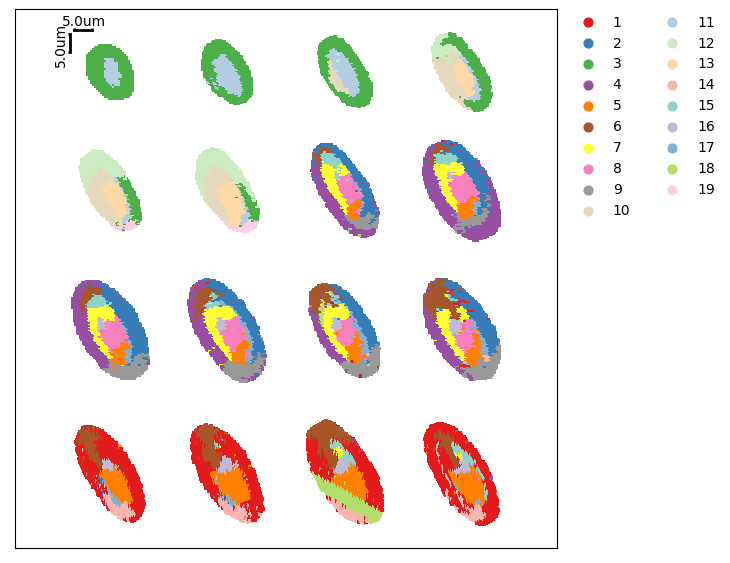

In [6]:
# clustering
ms_data.tl.pca(scope=slice_generator[:],mode='integrate', use_highly_genes=False, n_pcs=30, res_key='pca')
ms_data.tl.neighbors(scope=slice_generator[:],mode='integrate', pca_res_key='pca', res_key='neighbors')
ms_data.tl.leiden(scope=slice_generator[:],mode='integrate', neighbors_res_key='neighbors', res_key='leiden')

ms_data.plt.cluster_scatter(
            res_key='leiden',
            scope=slice_generator[:],
            mode='integrate',
            plotting_scale_width=10,          # the width of scale
            reorganize_coordinate=4,          # the number of plots in each row
            horizontal_offset_additional=20,  # adjustment for horizontal distance
            vertical_offset_additional=20     # adjustment for vertical distance
            )

## Micro-Environment

Before communication analysis, you have to generate micro enviroments first.

This function should be ran twice because it includes two parts:

- Calculating how the clusters are divided into micro environments under diffrent thresholds.
- Generating micro environments by setting a appropriate `method` and `threshold` based on the result of first part.

More details refer to [API](https://stereopy.readthedocs.io/en/latest/content/stereo.algorithm.gen_ccc_micro_envs.GenCccMicroEnvs.main.html).

In [7]:
ms_data.tl.gen_ccc_micro_envs(
            scope=slice_generator[:],
            mode='integrate', 
            cluster_res_key='leiden',
            res_key='ccc_micro_envs'
            )

[2023-07-10 22:58:14][Stereo][8464][MainThread][4848][ms_pipeline][96][INFO]: register algorithm gen_ccc_micro_envs to <class 'stereo.core.stereo_exp_data.StereoExpData'>-1816098060800


Now, you can choose a appropriate threshold based on this function's result.


DataFrame(autosize_mode='fit_viewport', disabled=True, frozen_columns=1, show_index=False, value=    threshold             ...)

Choose an appropriate value as `threshold` for subgroups.

In [8]:
ms_data.tl.gen_ccc_micro_envs(
            scope=slice_generator[:],
            mode='integrate', 
            method='split', 
            threshold=7, 
            res_key='ccc_micro_envs'
            )

[2023-07-10 22:58:40][Stereo][8464][MainThread][4848][ms_pipeline][96][INFO]: register algorithm gen_ccc_micro_envs to <class 'stereo.core.stereo_exp_data.StereoExpData'>-1816098060800


## Communication Analysis

The value of parameter `micro_envs` must be same as the parameter `res_key` on `merged_data.tl.gen_ccc_micro_envs`.

In [9]:
ms_data.tl.cell_cell_communication(
        scope=slice_generator[:],
        mode='integrate',
        analysis_type='statistical',
        cluster_res_key='leiden',
        species='MOUSE',
        database='liana',
        micro_envs='ccc_micro_envs',
        res_key='cell_cell_communication'
        )

[2023-07-10 22:59:12][Stereo][8464][MainThread][4848][ms_pipeline][96][INFO]: register algorithm cell_cell_communication to <class 'stereo.core.stereo_exp_data.StereoExpData'>-1816098060800
[2023-07-10 22:59:12][Stereo][8464][MainThread][4848][main][128][INFO]: species: MOUSE
[2023-07-10 22:59:12][Stereo][8464][MainThread][4848][main][129][INFO]: database: liana
[2023-07-10 22:59:13][Stereo][8464][MainThread][4848][main][186][INFO]: [statistical analysis] Threshold:0.1 Precision:3 Iterations:500 Threads:1
[2023-07-10 22:59:15][Stereo][8464][MainThread][4848][main][216][INFO]: Running Real Analysis
[2023-07-10 22:59:15][Stereo][8464][MainThread][4848][main][770][INFO]: Limiting cluster combinations using microenvironments
[2023-07-10 22:59:15][Stereo][8464][MainThread][4848][main][230][INFO]: Running Statistical Analysis
statistical analysis: 100%|██████████████████████████████████████| 500/500 [00:04<00:00, 122.16it/s]
[2023-07-10 22:59:19][Stereo][8464][MainThread][4848][main][1040][I

## Observing Result

You can run `ms_data.plt.ccc_dot_plot()` and `ms_data.plt.ccc_heatmap()` to visualize and observe the Cell-cell Communication result.

More details about [Cell-Cell Communication](https://stereopy.readthedocs.io/en/latest/Tutorials/Cell_Cell_Communication.html).

Observe analysis result by 3D visualization through an online website.

In [10]:
ms_data.plt.start_vt3d_browser(
            scope=slice_generator[:],
            mode='integrate',
            ccc_res_key='cell_cell_communication'
            )

[2023-07-10 22:59:33][Stereo][8464][MainThread][4848][ms_pipeline][103][INFO]: register plot_func start_vt3d_browser to <class 'stereo.core.stereo_exp_data.StereoExpData'>-1816098060800


Current front-dir is C:\Users\guolongyu\Desktop\BGI_Stereo\STOmics\Stereopy\stereo\plots\vt3d_browser/vt3d_browser
Starting server on http://127.0.0.1:7654
To ternimate this server , click: http://127.0.0.1:7654/endnow


Display 3D mesh in notebook.

In [ ]:
ms_data.plt.display_3d_ccc(scope=slice_generator[:],mode='integrate')

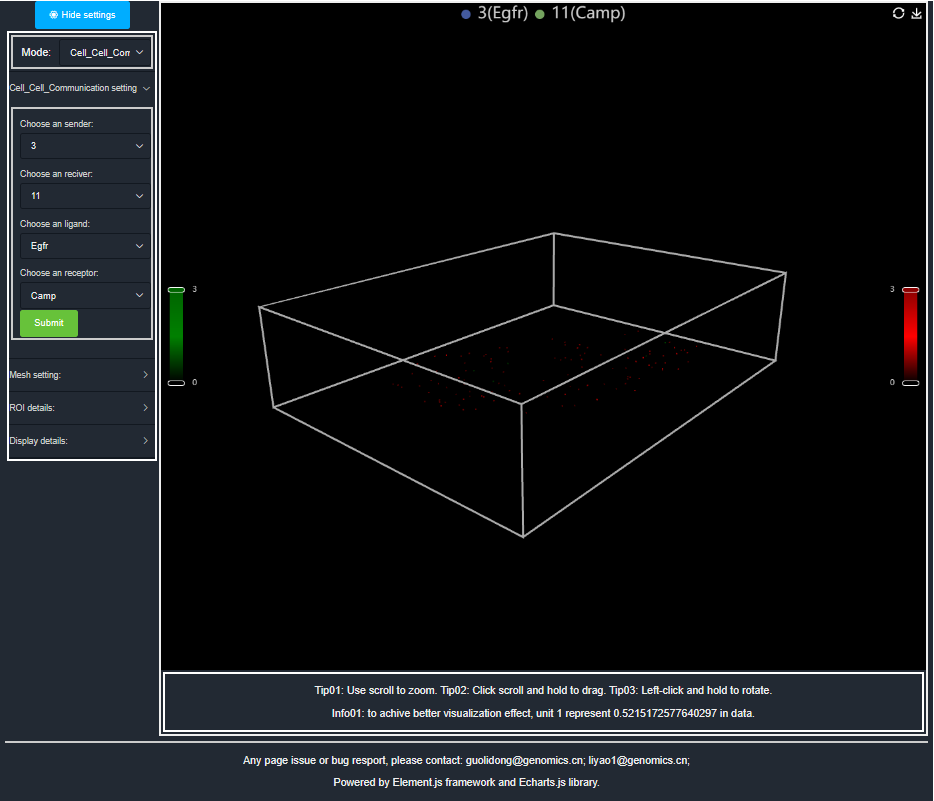